```
===================================================================
Judul Project : 
Membuat machine learning untuk memprediksi peluang nasabah membuka deposito guna untuk meningkatkan efektivitas promosi dan efisiensi biaya

By Rivaldi Revin
===================================================================
```

# **A. Import Libraries**

In [86]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Import module
from scipy import stats
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform, reciprocal
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

---

# **B. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Membaca file csv dengan pemisah ;
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Rincian pada table : 

| Variable Name | Role    | Type        | Demographic     | Description                                                                                                                                                                | Units | Missing Values |
| ------------- | ------- | ----------- | --------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----- | -------------- |
| age           | Feature | Integer     | Age             | Age of the client                                                                                                                                                          |       | No             |
| job           | Feature | Categorical | Occupation      | Type of job (`admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`) |       | No             |
| marital       | Feature | Categorical | Marital Status  | Marital status (`divorced`, `married`, `single`, `unknown`; note: "divorced" includes divorced or widowed)                                                                 |       | No             |
| education     | Feature | Categorical | Education Level | Education level (`basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)                                   |       | No             |
| default       | Feature | Binary      |                 | Has credit in default? (`yes`, `no`, `unknown`)                                                                                                                            |       | No             |
| balance       | Feature | Integer     |                 | Average yearly balance                                                                                                                                                     | Euros | No             |
| housing       | Feature | Binary      |                 | Has housing loan? (`yes`, `no`, `unknown`)                                                                                                                                 |       | No             |
| loan          | Feature | Binary      |                 | Has personal loan? (`yes`, `no`, `unknown`)                                                                                                                                |       | No             |
| contact       | Feature | Categorical |                 | Contact communication type (`cellular`, `telephone`)                                                                                                                       |       | No            |
| day\_of\_week | Feature | Date        |                 | Last contact day of the week                                                                                                                                               |       | No             |
| month         | Feature | Date        |                 | Last contact month of year (`jan`, `feb`, `mar`, ..., `nov`, `dec`)                                                                                                        |       | No             |
| duration      | Feature | Integer     |                 | Last contact duration in seconds. **Note:** Strongly affects the output target. Should be excluded for realistic predictive modeling since it's known only after the call. | Sec   | No             |
| campaign      | Feature | Integer     |                 | Number of contacts performed during this campaign and for this client (includes last contact)                                                                              |       | No             |
| pdays         | Feature | Integer     |                 | Number of days since client was last contacted from a previous campaign (`-1` means not previously contacted)                                                              |       | No            |
| previous      | Feature | Integer     |                 | Number of contacts before this campaign for this client                                                                                                                    |       | No             |
| poutcome      | Feature | Categorical |                 | Outcome of the previous marketing campaign (`failure`, `nonexistent`, `success`)                                                                                           |       | No            |
| y             | Target  | Binary      |                 | Has the client subscribed a term deposit? (`yes`, `no`)                                                                                                                    |       | No             |


In [3]:
# Menampilkan 5 baris pertama
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Menampilkan 5 baris terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Menampilkan 5 baris random
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18574,41,management,married,tertiary,yes,-1176,yes,yes,cellular,31,jul,81,1,-1,0,unknown,no
17588,51,blue-collar,divorced,primary,no,5,no,no,cellular,29,jul,600,2,-1,0,unknown,yes
23273,56,blue-collar,married,secondary,no,605,no,yes,cellular,27,aug,157,6,-1,0,unknown,no
15760,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,295,3,-1,0,unknown,no
12621,27,services,single,secondary,no,243,no,yes,unknown,4,jul,253,1,-1,0,unknown,no


In [6]:
# Menampilkan kolom
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Mengecek duplikat pada data
df.duplicated().sum()

0

Insight : Tidak ada data yang terduplikat

In [8]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Insight : 
- Data terdiri dari 17 kolom dan 45.211 baris.
- Terdiri dari data 10 kolom kategorikal dan 7 kolom numerikal
- Semua kolom tidak ada missing values dan tipe data sudah sesuai

In [9]:
# Mengecek nilai unik pada kolom kategorikal
# Menampilkan nilai unik 'job'
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
# Menampilkan nilai unik 'marital'
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
# Menampilkan nilai unik 'education'
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [12]:
# Menampilkan nilai unik 'default'
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
# Menampilkan nilai unik 'housing'
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
# Menampilkan nilai unik 'loan'
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
# Menampilkan nilai unik 'contact'
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [16]:
# Menampilkan nilai unik 'month'
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [17]:
# Menampilkan nilai unik 'poutcome'
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [18]:
# Menampilkan nilai unik 'y'
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
# Menampilkan jumlah frekuensi kemunculan nilai unik pada 'y'
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [20]:
# Mengubah value 
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

C:\Users\Rivaldi Revin\AppData\Local\Temp\ipykernel_20160\810890303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes': 1, 'no': 0})


In [21]:
# Summary dataset pada kolom numerikal
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Insight :
1. Age (Usia)
    - Rata-rata usia nasabah: ~41 tahun, dengan mayoritas di rentang 33–48 tahun.
    - Usia termuda 18 tahun, tertua 95 tahun → data cukup bervariasi, bisa memengaruhi perilaku investasi.
    - Implikasi: Segmentasi kampanye bisa dibedakan berdasarkan rentang usia.

2. Balance (Saldo rata-rata di akun)
    - Rata-rata saldo: 1.362 EUR, tapi standar deviasi sangat tinggi (~3.045 EUR) → distribusi tidak merata.
    - Saldo minimum -8.019 EUR → ada nasabah dengan saldo negatif (overdraft).
    - Saldo maksimum sangat ekstrem (102.127 EUR) → outlier yang signifikan.
    - Implikasi: Perlu penanganan outlier; saldo tinggi bisa jadi indikator daya beli untuk deposito.

3. Day (Hari terakhir kontak dalam sebulan)
    - Median: 16 → sebagian besar kontak dilakukan pertengahan bulan.
    - Rentang hari 1–31 → distribusi cukup merata tapi mungkin ada pola tertentu terkait respon nasabah.

4. Duration (Durasi panggilan terakhir, dalam detik)
    - Rata-rata durasi: 258 detik (~4,3 menit).
    - Durasi minimum 0 detik → kemungkinan panggilan tidak tersambung.
    - Durasi maksimum 4.918 detik (~82 menit) → ada interaksi yang sangat lama.
    - Implikasi: Durasi panggilan biasanya berkorelasi positif dengan peluang konversi.

5. Campaign (Jumlah kontak dalam kampanye ini)
    - Median: 2 kali kontak → sebagian besar nasabah dihubungi 1–3 kali.
    - Nilai maksimum 63 kali → ada nasabah yang dihubungi sangat sering (potensi spam).
    - Implikasi: Kontak berlebihan bisa menurunkan respons positif.

6. Pdays (Hari sejak terakhir dihubungi pada kampanye sebelumnya)
    - Banyak nilai -1 → menandakan nasabah belum pernah dihubungi sebelumnya.
    - Maksimum 871 hari → ada nasabah yang sudah lama sekali tidak dihubungi.
    - Implikasi: Pdays = -1 mungkin perlu dikategorikan khusus.

7. Previous (Jumlah kontak sebelum kampanye ini)
    - Median: 0 → mayoritas belum pernah dihubungi sebelumnya.
    - Nilai maksimum 275 → ada nasabah yang sudah sering dihubungi.
    - Implikasi: Nasabah dengan riwayat kontak tinggi mungkin sudah memiliki persepsi tertentu terhadap bank.

In [22]:
# Summary dataset pada kolom kategorikal
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


Insight :
1. Job (Jenis pekerjaan)
    - Ada 12 jenis pekerjaan.
    - Paling umum: blue-collar (9.732 orang, ~21,5%).
    - Implikasi: Segmentasi kampanye bisa menargetkan pekerjaan dominan, tapi jangan lupakan pekerjaan lain yang mungkin punya potensi lebih besar untuk produk tertentu.

2. Marital (Status pernikahan)
    - Ada 3 kategori: mayoritas married (27.214 orang, ~60%).
    - Implikasi: Status pernikahan bisa memengaruhi kebutuhan produk (misalnya deposito jangka panjang untuk keluarga).

3. Education (Pendidikan)
    - Ada 4 kategori, terbanyak: secondary (23.202 orang, ~51%).
    - Implikasi: Tingkat pendidikan dapat memengaruhi cara komunikasi dan pendekatan marketing.

4. Default (Kredit macet)
    - Hanya 2 kategori: mayoritas no (44.396 orang, ~98%).
    - Implikasi: Kredit macet rendah, tapi yang "yes" mungkin perlu perlakuan risiko berbeda.

5. Housing (Pinjaman rumah)
    - Ada 2 kategori: mayoritas yes (25.130 orang, ~56%).
    - Implikasi: Pemilik pinjaman rumah mungkin lebih sensitif terhadap tawaran bunga deposito.

6. Loan (Pinjaman pribadi)
    - Ada 2 kategori: mayoritas no (37.967 orang, ~84%).
    - Implikasi: Nasabah tanpa pinjaman pribadi mungkin punya kapasitas finansial lebih untuk produk simpanan.

7. Contact (Jenis kontak)
    - Ada 3 kategori, paling banyak cellular (29.285 orang, ~64,8%).
    - Implikasi: Kontak via seluler masih jadi kanal utama, bisa dioptimalkan.

8. Month (Bulan kampanye terakhir)
    - Ada 12 bulan, terbanyak May (13.766 orang, ~30,4%).
    - Implikasi: Ada pola musiman; Mei mungkin periode puncak kampanye.

9. Poutcome (Hasil kampanye sebelumnya)
    - Ada 4 kategori, mayoritas unknown (36.959 orang, ~81,8%).
    - Implikasi: Data hasil kampanye sebelumnya banyak yang hilang/tidak diketahui, sehingga fitur ini mungkin perlu encoding khusus atau pengisian nilai.

10. y (Target — Berlangganan deposito?)
    - Ada 2 kategori, mayoritas no (39.922 orang, ~88%).
    - Implikasi: Dataset imbalanced → perlu teknik penyeimbangan seperti SMOTE atau class weighting dalam model machine learning.

---

# **C. Exploratory Data Analysis (EDA)**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## **C.1 - Question 1**

1. Apa pendidikan terakhir yang paling banyak ditempuh nasabah?

In [23]:
# Menampilkan persentase pendidikan terakhir
# Base data
df_education = df.groupby('education').agg({'education':'count'})
df_education

,education
education,
primary,6851
secondary,23202
tertiary,13301
unknown,1857


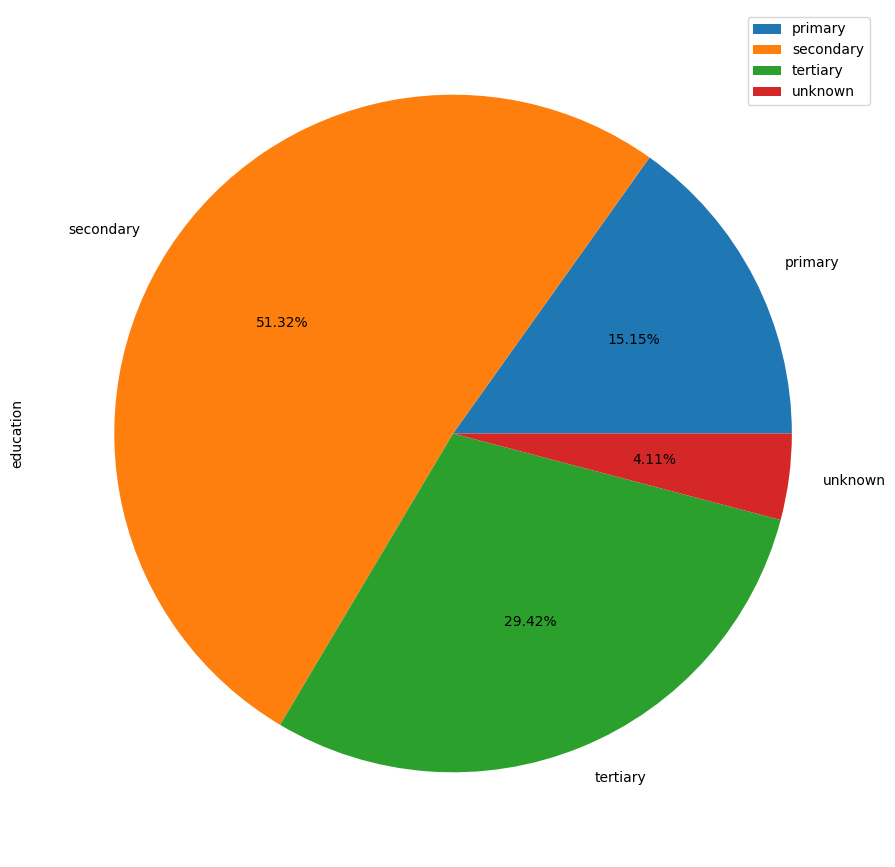

In [24]:
# Pie chart using pandas
df_education.plot(kind='pie', y='education', figsize=(11,11), autopct='%1.2f%%')

# Show
plt.show()

Insight : 

- Tingkatan edukasi pada dataset ini mengacu pada standar internasional (mirip International Standard Classification of Education / ISCED), penjelasannya:
    - Primary → Pendidikan dasar, SD atau setara
    - Secondary → Pendidikan menengah, SMP dan SMA atau setara
    - Tertiary → Pendidikan tinggi, Perguruan tinggi (Diploma, S1, S2, S3) atau setara
- Berdasarkan Pie Chart diatas dapat diketahui bahwa nasabah yang paling banyak mengenyam pendidikan sekelas `secondary` dengan percentase 51.32% atau 23.202 orang, posisi kedua ada `tertiary` dengan percentase 29,42% atau 13.301, ketiga ada `primary` dengan percentase 15.15% atau 6.851 dan diposisi terakhir ada `unknown`, 4.11% atau 1.857 orang (Tingkat pendidikan tidak diketahui / tidak tercatat, bisa karena responden tidak menjawab atau data hilang).



---

## **C.2 - Question 2**

2. Apa pekerjaan yang paling banyak ditekuni oleh nasabah berdasarkan saldo tabungan mereka ?

In [25]:
# Menampilkan nilai unik
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [26]:
# Menampilkan bar chart tentang frekuensi pekerjaan yang ditekuni nasabah
# Base datanya
frek_job = df.groupby(['job'])['balance'].mean().sort_values(ascending=False).head(10)
frek_job

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
Name: balance, dtype: float64

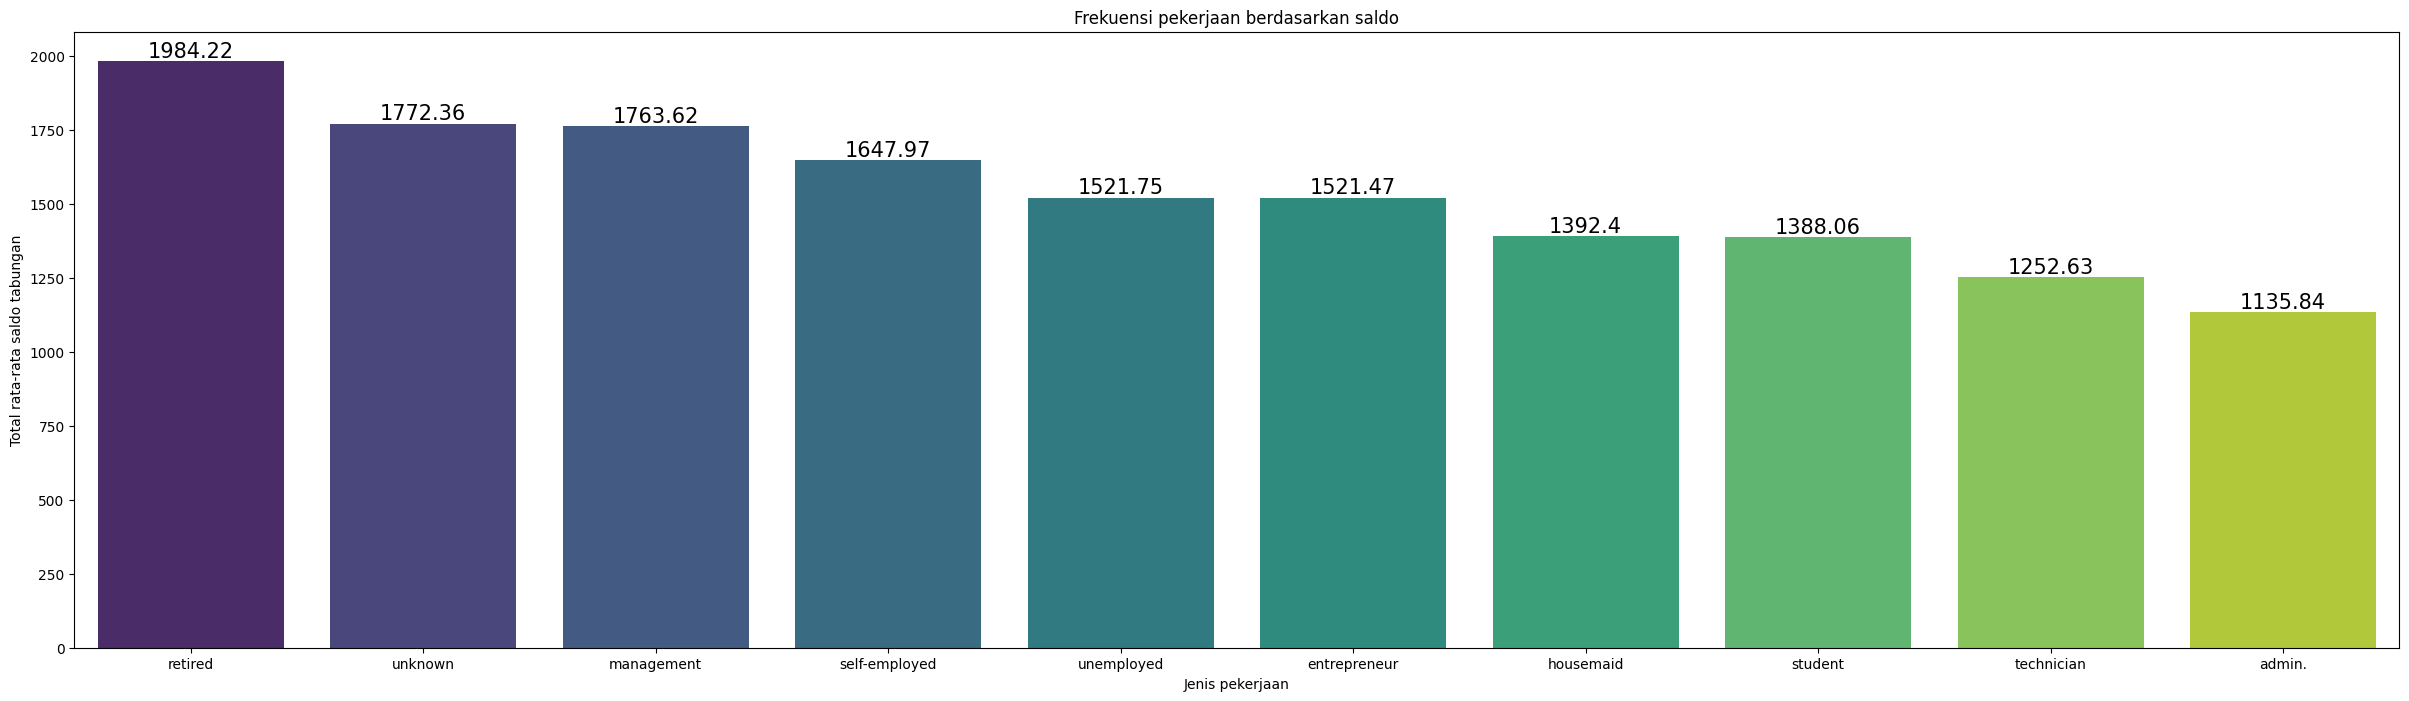

In [27]:
# Set size
plt.figure(figsize=(30,8))

# Barchart using seaborn
ax = sns.barplot(x=frek_job.index, y=frek_job.values,
            hue=frek_job.index, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=15)
ax.bar_label(ax.containers[1], fontsize=15)
ax.bar_label(ax.containers[2], fontsize=15)
ax.bar_label(ax.containers[3], fontsize=15)
ax.bar_label(ax.containers[4], fontsize=15)
ax.bar_label(ax.containers[5], fontsize=15)
ax.bar_label(ax.containers[6], fontsize=15)
ax.bar_label(ax.containers[7], fontsize=15)
ax.bar_label(ax.containers[8], fontsize=15)
ax.bar_label(ax.containers[9], fontsize=15)
# Add detail
plt.title('Frekuensi pekerjaan berdasarkan saldo')
plt.xlabel('Jenis pekerjaan')
plt.ylabel('Total rata-rata saldo tabungan')

# Show data viz
plt.show()

Insight :
- Saldo tertinggi dimiliki oleh nasabah pensiunan (retired) dengan rata-rata saldo tabungan sekitar 1.984. Hal ini wajar karena umumnya pensiunan memiliki tabungan hasil akumulasi penghasilan sebelumnya, serta kemungkinan lebih sedikit pengeluaran rutin dibandingkan pekerja aktif.
- Kategori unknown dan management juga memiliki rata-rata saldo yang tinggi (1.772 dan 1.763), yang bisa mengindikasikan posisi manajerial berpenghasilan besar atau adanya nasabah dengan data pekerjaan tidak tercatat namun memiliki kemampuan finansial baik.
- Kelompok admin, technician, student cenderung memiliki saldo lebih rendah (1.135 – 1.252), kemungkinan karena penghasilan bulanan lebih kecil atau masih berada pada tahap awal karier/pendidikan.
- Menariknya, pengangguran (unemployed) memiliki saldo relatif tinggi (1.521), yang bisa jadi disebabkan oleh adanya tabungan atau aset dari pekerjaan sebelumnya, atau bantuan finansial lain.
- Secara umum, jenis pekerjaan sangat memengaruhi rata-rata saldo, yang artinya variabel job berpotensi menjadi fitur penting dalam model prediksi pembukaan deposito.

---

# **D. Feature Engineering**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [28]:
# Split dataset antara `X` dan `y`
X = df.drop(['y'], axis=1)
y = df['y']
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [29]:
# Split dataset into train-Set and test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (33908, 16)
Test size  :  (11303, 16)


## **D.1 - Cek Outlier dan Missing Values**

In [30]:
# Get Numerical Columns and Categorical Columns pada X_train
X_train_num = X_train.select_dtypes(include=['number'])
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_num

,age,balance,day,duration,campaign,pdays,previous
33362,39,3870,20,72,1,-1,0
28229,31,1073,29,82,1,-1,0
37952,36,886,14,362,6,-1,0
43408,19,394,5,327,3,-1,0
9897,45,0,9,100,1,-1,0
...,...,...,...,...,...,...,...
30403,35,995,5,39,1,-1,0
21243,35,750,18,233,12,-1,0
42613,35,323,11,261,2,-1,0
43567,70,616,27,149,2,182,1


In [31]:
# Cek distribusi apakah normal atau tidak pada kolom numerikal
print('Distribusi kolom `age`  : ', X_train_num['age'].skew())
print('Distribusi kolom `balance` : ', X_train_num['balance'].skew())
print('Distribusi kolom `day` : ', X_train_num['day'].skew())
print('Distribusi kolom `duration` : ', X_train_num['duration'].skew())
print('Distribusi kolom `campaign` : ', X_train_num['campaign'].skew())
print('Distribusi kolom `pdays` : ', X_train_num['pdays'].skew())
print('Distribusi kolom `previous` : ', X_train_num['previous'].skew())

Distribusi kolom `age`  :  0.6777112760957349
Distribusi kolom `balance` :  8.706725986122576
Distribusi kolom `day` :  0.09529631798007465
Distribusi kolom `duration` :  3.240661084349302
Distribusi kolom `campaign` :  4.909863277105705
Distribusi kolom `pdays` :  2.620341847911579
Distribusi kolom `previous` :  45.55938959960319


Insight : 
- Hampir semua kolom memiliki rentang lebih tinggi dari -0,5 hingga 0,5. Jadi oleh karena itu distribusi apa pun di luar rentang ini dianggap sebagai skewed distribution.
- Perlu cek distribusi untuk menentukan ketika proses feature scaling apa yang akan digunakan pada prose pipeline. Dari hasil uji distribusi diatas akan menggunakan MinMaxScaler.

In [32]:
# Menampilkan informasi X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33908 entries, 33362 to 2732
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.4+ MB


Insight : Tidak ada missing values di semua kolom

---

## **D.2 - Feature Selection**

### **D.2.1 - Uji Korelasi**

**Uji korelasi menggunakan Spearman karena bernilai skew :**

In [33]:
X_train_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [34]:
# Analisis korelasi menggunakan Spearman antara kolom age dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['age'], y_train)

print(f"Nilai uji korelasi `age` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `age` dan `y_train` adalah rho-correlation: -0.01, p-value: 0.0237290910166029


In [35]:
# Analisis korelasi menggunakan Spearman antara kolom balance dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['balance'], y_train)

print(f"Nilai uji korelasi `balance` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `balance` dan `y_train` adalah rho-correlation: 0.10, p-value: 2.184359909008703e-74


In [36]:
# Analisis korelasi menggunakan Spearman antara kolom day dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['day'], y_train)

print(f"Nilai uji korelasi `day` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `day` dan `y_train` adalah rho-correlation: -0.03, p-value: 3.837729632782479e-10


In [37]:
# Analisis korelasi menggunakan Spearman antara kolom duration dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['duration'], y_train)

print(f"Nilai uji korelasi `duration` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `duration` dan `y_train` adalah rho-correlation: 0.34, p-value: 0.0


In [38]:
# Analisis korelasi menggunakan Spearman antara kolom campaign dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['campaign'], y_train)

print(f"Nilai uji korelasi `campaign` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `campaign` dan `y_train` adalah rho-correlation: -0.09, p-value: 1.6848126029710554e-55


In [39]:
# Analisis korelasi menggunakan Spearman antara kolom pdays dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['pdays'], y_train)

print(f"Nilai uji korelasi `pdays` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `pdays` dan `y_train` adalah rho-correlation: 0.15, p-value: 4.1395993738130917e-168


In [40]:
# Analisis korelasi menggunakan Spearman antara kolom previous dan target
corr_rho, pval_s = stats.spearmanr(X_train_num['previous'], y_train)

print(f"Nilai uji korelasi `previous` dan `y_train` adalah rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai uji korelasi `previous` dan `y_train` adalah rho-correlation: 0.16, p-value: 6.155946419451661e-205


Hasil Uji Korelasi Spearman (fitur vs y_train) :

| Fitur    | Korelasi Spearman (ρ) | P-Value   | Kekuatan Hubungan | Arah Hubungan |
| -------- | --------------------- | --------- | ----------------- | ------------- |
| age      | -0.01                 | 2.37e-02  | Sangat lemah      | Negatif       |
| balance  | 0.10                  | 2.18e-74  | Lemah             | Positif       |
| day      | -0.03                 | 3.84e-10  | Sangat lemah      | Negatif       |
| duration | 0.34                  | 0.0       | Sedang            | Positif       |
| campaign | -0.09                 | 1.68e-55  | Lemah             | Negatif       |
| pdays    | 0.15                  | 4.14e-168 | Lemah             | Positif       |
| previous | 0.16                  | 6.16e-205 | Lemah             | Positif       |


Insight :
- `duration` punya pengaruh paling besar (ρ=0.34, sedang, positif) terhadap target.
- `previous` dan `pdays` berpengaruh positif lemah (ρ≈0.15–0.16).
- `balance` punya korelasi positif lemah (ρ=0.10).
- `campaign` dan `day` berkorelasi negatif lemah, sedangkan `age` hampir tidak berpengaruh.
- Semua hubungan signifikan secara statistik, tetapi sebagian besar lemah secara praktis.

---

**Uji korelasi menggunakan Kendall untuk menganalisa pada kolom kategorikal :**

In [41]:
X_train_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [42]:
# Analisis korelasi menggunakan Kendall antara kolom job dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['job'], y_train)

print(f"Nilai uji korelasi `job` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `job` dan `y_train` adalah tau-correlation: 0.04, p-value: 3.869953133502215e-16


In [43]:
# Analisis korelasi menggunakan Kendall antara kolom marital dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['marital'], y_train)

print(f"Nilai uji korelasi `marital` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `marital` dan `y_train` adalah tau-correlation: 0.05, p-value: 2.361864873202846e-18


In [44]:
# Analisis korelasi menggunakan Kendall antara kolom education dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['education'], y_train)

print(f"Nilai uji korelasi `education` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `education` dan `y_train` adalah tau-correlation: 0.06, p-value: 1.6041522439417492e-33


In [45]:
# Analisis korelasi menggunakan Kendall antara kolom default dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['default'], y_train)

print(f"Nilai uji korelasi `default` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `default` dan `y_train` adalah tau-correlation: -0.02, p-value: 1.5905747823363456e-05


In [46]:
# Analisis korelasi menggunakan Kendall antara kolom housing dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['housing'], y_train)

print(f"Nilai uji korelasi `housing` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `housing` dan `y_train` adalah tau-correlation: -0.14, p-value: 5.257890648406348e-150


In [47]:
# Analisis korelasi menggunakan Kendall antara kolom loan dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['loan'], y_train)

print(f"Nilai uji korelasi `loan` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `loan` dan `y_train` adalah tau-correlation: -0.07, p-value: 6.69433576095774e-39


In [48]:
# Analisis korelasi menggunakan Kendall antara kolom contact dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['contact'], y_train)

print(f"Nilai uji korelasi `contact` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `contact` dan `y_train` adalah tau-correlation: -0.14, p-value: 1.372223040448023e-160


In [49]:
# Analisis korelasi menggunakan Kendall antara kolom month dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['month'], y_train)

print(f"Nilai uji korelasi `month` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `month` dan `y_train` adalah tau-correlation: -0.02, p-value: 0.0008607201510962214


In [50]:
# Analisis korelasi menggunakan Kendall antara kolom poutcome dan target
corr_tau, pval_k = stats.kendalltau(X_train_cat['poutcome'], y_train)

print(f"Nilai uji korelasi `poutcome` dan `y_train` adalah tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

Nilai uji korelasi `poutcome` dan `y_train` adalah tau-correlation: -0.14, p-value: 1.7891796262341883e-146


Hasil Uji Korelasi Kendall’s tau (fitur vs y_train) :

| Fitur     | Korelasi Kendall’s τ | P-Value   | Kekuatan Hubungan | Arah Hubungan |
| --------- | -------------------- | --------- | ----------------- | ------------- |
| job       | 0.04                 | 3.87e-16  | Sangat lemah      | Positif       |
| marital   | 0.05                 | 2.36e-18  | Sangat lemah      | Positif       |
| education | 0.06                 | 1.60e-33  | Sangat lemah      | Positif       |
| default   | -0.02                | 1.59e-05  | Sangat lemah      | Negatif       |
| housing   | -0.14                | 5.26e-150 | Lemah             | Negatif       |
| loan      | -0.07                | 6.69e-39  | Sangat lemah      | Negatif       |
| contact   | -0.14                | 1.37e-160 | Lemah             | Negatif       |
| month     | -0.02                | 8.61e-04  | Sangat lemah      | Negatif       |
| poutcome  | -0.14                | 1.79e-146 | Lemah             | Negatif       |


Insight :
- `housing`, `contact`, dan `poutcome` memiliki korelasi negatif lemah (τ≈-0.14) terhadap target.
- Fitur lain seperti `job`, `marital`, dan `education` hanya berkorelasi positif sangat lemah.
- Semua p-value < 0.05 → hubungan signifikan secara statistik, tetapi secara praktis pengaruhnya kecil.

---

### **D.2.2 - Uji Multicollinearity**

Uji Multicollinearity dilakukan untuk menguji nilai multicolinearity antara kolom numerik

In [51]:
# Membuat fungsi yang menghitung VIF/Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
# Cek Multicolinearity pada dataset
calc_vif(X_train_num)

,variables,VIF
0,age,5.025535
1,balance,1.209552
2,day,3.984737
3,duration,1.887634
4,campaign,1.827244
5,pdays,1.423395
6,previous,1.305486


Insight : 
- Semua variabel memiliki nilai VIF < 10, artinya tidak ada indikasi multikolinearitas yang serius.
- `age` memiliki VIF tertinggi (5.03), mendekati batas kewaspadaan (umumnya >5 mulai diperhatikan), sehingga mungkin memiliki korelasi sedang dengan variabel lain.
- Variabel lain seperti `balance`, `day`, `duration`, `campaign`, `pdays`, dan `previous` memiliki VIF rendah (<4), sehingga relatif independen.
- Secara keseluruhan, model dapat menggunakan semua variabel ini tanpa risiko besar dari multikolinearitas.

Kesimpulan Keseluruhan :
- Beberapa fitur punya korelasi sangat lemah dengan target (age, day, job, marital, education, default, month) sehingga kontribusinya kemungkinan kecil.
- Tidak ada masalah multikolinearitas serius (VIF < 10), semua fitur aman dipakai.
- Dari hasil uji korelasi dan uji multikolinearity tidak ada penghapusan fitur, semua fitur akan digunakan pada model.

---

# **E. Model Definition**

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Model yang digunakan : K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, dan Random Forest

## **E.1 - K-Nearest Neighbors (KNN)**
Definisi : Algoritma lazy learning yang mengklasifikasikan data berdasarkan mayoritas label dari k tetangga terdekatnya dalam ruang fitur menggunakan jarak (umumnya Euclidean).

Alasan penggunaan :
- Sederhana, mudah diimplementasikan.
- Cocok untuk dataset yang tidak terlalu besar.
- Dapat menangkap pola non-linear.

Hyperparameter utama :
- n_neighbors → jumlah tetangga terdekat yang digunakan (misalnya 3, 5, 7).
- metric → metode perhitungan jarak (default: Euclidean).
- weights → pembobotan tetangga (uniform atau distance).





---

## **E.2 - Support Vector Machine (SVM)**

Definisi : Algoritma klasifikasi yang mencari hyperplane terbaik untuk memisahkan kelas, memaksimalkan jarak (margin) antar kelas. Dapat menggunakan kernel untuk menangani data non-linear.

Alasan penggunaan :
- Efektif untuk data berdimensi tinggi.
- Dapat menangani hubungan non-linear dengan kernel trick.
- Kuat terhadap overfitting jika parameter diatur tepat.

Hyperparameter utama :
- C → kontrol regularisasi (besar C → sedikit pelanggaran margin).
- kernel → tipe kernel (linear, rbf, poly, sigmoid).
- gamma → tingkat pengaruh titik data pada fungsi keputusan (untuk RBF/poly/sigmoid).

---

## **E.3 - Decision Tree**

Definisi : Model berbasis pohon yang memecah dataset menjadi cabang-cabang berdasar fitur yang memaksimalkan pemisahan kelas.

Alasan penggunaan:
- Interpretasi mudah (white-box model).
- Dapat menangani data kategorikal dan numerik tanpa normalisasi.
- Dapat menangkap interaksi antar fitur.

Hyperparameter utama:
- max_depth → kedalaman maksimum pohon.
- min_samples_split → jumlah minimal sampel untuk split.
- min_samples_leaf → jumlah minimal sampel di daun.
- criterion → metode pemisahan (gini atau entropy).

---

## **E.4 - Random Forest**

Definisi : Ensemble dari banyak Decision Tree yang dilatih dengan bagging (bootstrap aggregating) dan pemilihan subset fitur acak untuk setiap pohon.

Alasan penggunaan:
- Mengurangi overfitting dibanding satu pohon.
- Stabil dan akurat untuk berbagai tipe data.
- Menyediakan feature importance.

Hyperparameter utama:
- n_estimators → jumlah pohon.
- max_depth, min_samples_split, min_samples_leaf → pembatas kompleksitas pohon.
- max_features → jumlah fitur maksimum yang dipakai tiap split.

---

# **F. Model Training**

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [53]:
# Daftar kolom sesuai tipe
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns_nominal = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
cat_columns_ordinal = ['education']

# Urutan level untuk fitur ordinal
education_order = [['unknown', 'primary', 'secondary', 'tertiary']]  

In [54]:
# Membuat Pipeline 
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())

cat_nom_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown="ignore"))

cat_ord_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OrdinalEncoder(categories=education_order))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat_nom', cat_nom_pipeline, cat_columns_nominal),
    ('pipe_cat_ord', cat_ord_pipeline, cat_columns_ordinal)
])
# Model training dengan KNeighborsClassifier
m1_knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier(n_neighbors = 10))
m1_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenco...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]))]),
                                                  ['education'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [55]:
# Model training dengan Support Vector Machine (SVM)
m1_svm = make_pipeline(preprocessing_pipeline, SVC(kernel='rbf', C=1.0, gamma='scale'))
m1_svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]))]),
                                                  ['education'])])),
                ('svc', SVC())])

In [56]:
# Model training dengan Decision Tree
m1_tree = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier(random_state=42))
m1_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenco...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]))]),
                                                  ['education'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [57]:
# Model training dengan Random Forest
m1_forest = make_pipeline(preprocessing_pipeline, RandomForestClassifier(random_state=42))
m1_forest.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotenco...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]))]),
                                                  ['education'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

---

# **G. Model Evaluation**

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## **G.1 - Evaluasi KNeighborsClassifier**

In [58]:
# Check performance model dengan beberapa metrics Classificaiton pada KNeighborsClassifier
y_pred_train = m1_knn.predict(X_train)
y_pred_test = m1_knn.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29944
           1       0.75      0.22      0.34      3964

    accuracy                           0.90     33908
   macro avg       0.83      0.60      0.64     33908
weighted avg       0.89      0.90      0.87     33908


Test
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9978
           1       0.63      0.18      0.28      1325

    accuracy                           0.89     11303
   macro avg       0.77      0.58      0.61     11303
weighted avg       0.87      0.89      0.86     11303



In [59]:
# Evaluasi dengan cross_validate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(m1_knn, X, y, cv=5, scoring=scoring)

print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Std Accuracy:", cv_results['test_accuracy'].std())


Mean Accuracy: 0.6474921057818988
Std Accuracy: 0.14657875955778482


In [60]:
# Hasil cross_validate pada KNeighborsClassifier
cv_results

{'fit_time': array([0.70181203, 0.15351939, 0.14451265, 0.13707542, 0.1562202 ]),
 'score_time': array([1.80772638, 1.34244967, 1.29936242, 1.2428956 , 2.82538605]),
 'test_accuracy': array([0.8818976 , 0.68104402, 0.5530856 , 0.67772617, 0.44370714]),
 'test_precision': array([0.27272727, 0.00966184, 0.02635757, 0.08571429, 0.11316712]),
 'test_recall': array([0.00567108, 0.01702933, 0.07844991, 0.18147448, 0.54914934]),
 'test_f1': array([0.01111111, 0.01232877, 0.03945805, 0.1164342 , 0.1876615 ]),
 'test_roc_auc': array([0.48848917, 0.16235159, 0.23355105, 0.44332581, 0.49424274])}

In [61]:
# Evaluasi ke 2 dengan cross_validate
scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

cv_results = cross_validate(m1_knn, X, y, cv=5, scoring=scoring)

print("Mean MAE:", -cv_results['test_neg_mean_absolute_error'].mean())
print("Std MAE:", cv_results['test_neg_mean_absolute_error'].std())

Mean MAE: 0.35250789421810114
Std MAE: 0.1465787595577848


In [62]:
# Hasil cross_validate pada KNeighborsClassifier
cv_results

{'fit_time': array([0.15416288, 0.15314388, 0.17902827, 0.16214108, 0.15659165]),
 'score_time': array([0.60523224, 0.65608263, 0.70034862, 0.61254287, 0.62930059]),
 'test_neg_mean_absolute_error': array([-0.1181024 , -0.31895598, -0.4469144 , -0.32227383, -0.55629286]),
 'test_neg_root_mean_squared_error': array([-0.3436603 , -0.56476188, -0.66851657, -0.56769167, -0.74585042]),
 'test_r2': array([-0.14320258, -2.08965403, -3.32560797, -2.11923327, -4.38426333])}

Berikut tabel ringkasan hasil evaluasi dua percobaan KNeighborsClassifier :

| Evaluasi | Metric    | Fold 1  | Fold 2  | Fold 3  | Fold 4  | Fold 5  | Mean    | Std    |
| -------- | --------- | ------- | ------- | ------- | ------- | ------- | ------- | ------ |
| **1**    | Accuracy  | 0.8819  | 0.6810  | 0.5531  | 0.6777  | 0.4437  | 0.6475  | 0.1466 |
|          | Precision | 0.2727  | 0.0097  | 0.0264  | 0.0857  | 0.1132  | 0.1015  | 0.0946 |
|          | Recall    | 0.0057  | 0.0170  | 0.0784  | 0.1815  | 0.5491  | 0.1668  | 0.2075 |
|          | F1-score  | 0.0111  | 0.0123  | 0.0395  | 0.1164  | 0.1877  | 0.0730  | 0.0729 |
|          | ROC-AUC   | 0.4885  | 0.1624  | 0.2336  | 0.4433  | 0.4942  | 0.3644  | 0.1503 |
| **2**    | MAE       | 0.1181  | 0.3190  | 0.4469  | 0.3223  | 0.5563  | 0.3525  | 0.1466 |
|          | RMSE      | 0.3437  | 0.5648  | 0.6685  | 0.5677  | 0.7459  | 0.5789  | 0.1335 |
|          | R²        | -0.1432 | -2.0897 | -3.3256 | -2.1192 | -4.3843 | -2.4128 | 1.4529 |


1. Evaluasi Pertama ((Metode Klasifikasi — accuracy, precision, recall, f1, roc_auc))
    - Mean Accuracy: 0.6475, Std: 0.1466 → Akurasi rata-rata tergolong rendah dan varians cukup besar antar-fold, artinya performa model tidak konsisten pada data yang berbeda.
    - Precision sangat rendah (rata-rata < 0.15) → Banyak prediksi positif yang salah (false positive tinggi).
    - Recall juga rendah pada sebagian besar fold → Model gagal menangkap banyak data positif yang sebenarnya.
    - F1-score rendah → Keseimbangan precision dan recall buruk.
    - ROC AUC mendekati 0.5 pada sebagian besar fold → Kemampuan model membedakan kelas positif dan negatif nyaris setara tebak acak.

Insight: Model KNN pada pengaturan ini belum mampu memisahkan kelas dengan baik; kemungkinan distribusi kelas tidak cocok atau parameter K tidak optimal.

2. Evaluasi Kedua (Metode Regresi — MAE, RMSE, R²)
    - Mean MAE: 0.3525 → Rata-rata kesalahan absolut prediksi cukup besar jika target dalam skala 0–1.
    - RMSE juga tinggi → Menandakan ada error besar pada sebagian prediksi.
    - R² negatif di semua fold → Model lebih buruk daripada baseline sederhana (misal memprediksi rata-rata target).

Insight: Jika target diubah menjadi numerik (1/0) dan dievaluasi dengan regresi, KNN gagal membentuk hubungan prediksi yang baik.

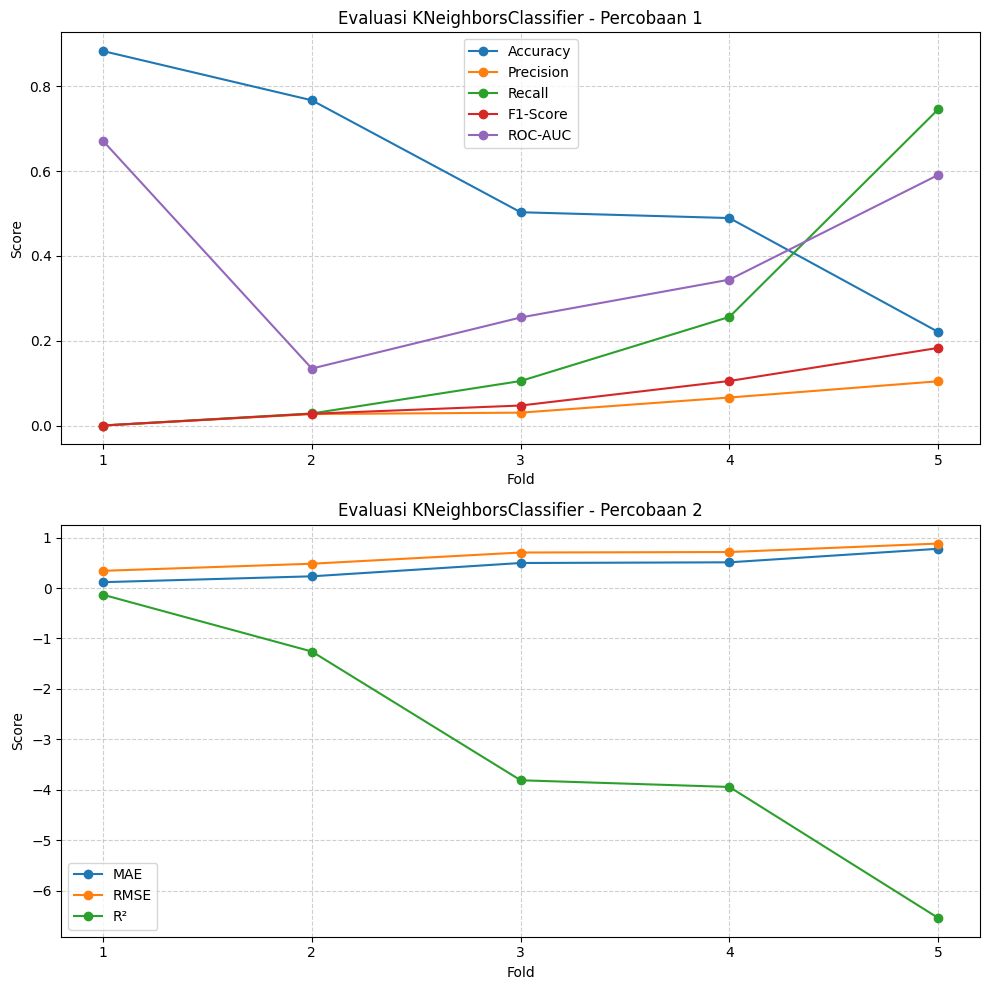

In [63]:
# Data evaluasi KNeighborsClassifier - Dua percobaan
# Percobaan 1
metrics_1 = {
    "Accuracy": [0.8830, 0.7669, 0.5029, 0.4892, 0.2206],
    "Precision": [0.0000, 0.0270, 0.0303, 0.0660, 0.1043],
    "Recall": [0.0000, 0.0284, 0.1049, 0.2561, 0.7457],
    "F1-Score": [0.0000, 0.0277, 0.0471, 0.1050, 0.1830],
    "ROC-AUC": [0.6711, 0.1343, 0.2547, 0.3440, 0.5909]
}

# Percobaan 2
metrics_2 = {
    "MAE": [0.1170, 0.2331, 0.4971, 0.5108, 0.7794],
    "RMSE": [0.3420, 0.4828, 0.7051, 0.7147, 0.8828],
    "R²": [-0.1325, -1.2583, -3.8116, -3.9443, -6.5433]
}

# Membuat plot untuk percobaan 1
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Percobaan 1: KNN klasifikasi
for metric, values in metrics_1.items():
    axes[0].plot(range(1, 6), values, marker='o', label=metric)
axes[0].set_title("Evaluasi KNeighborsClassifier - Percobaan 1")
axes[0].set_xlabel("Fold")
axes[0].set_ylabel("Score")
axes[0].set_xticks(range(1, 6))
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Percobaan 2: KNN regresi
for metric, values in metrics_2.items():
    axes[1].plot(range(1, 6), values, marker='o', label=metric)
axes[1].set_title("Evaluasi KNeighborsClassifier - Percobaan 2")
axes[1].set_xlabel("Fold")
axes[1].set_ylabel("Score")
axes[1].set_xticks(range(1, 6))
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Kesimpulan : Model menunjukkan ketidakkonsistenan performa antar fold (Std tinggi), yang mengindikasikan kemungkinan overfitting atau data yang tidak seimbang.

---

## **G.2 - Evaluasi Support Vector Machine (SVM)**

In [64]:
# Check performance model dengan beberapa metrics Classificaiton pada Support Vector Machine (SVM)
y_pred_train = m1_svm.predict(X_train)
y_pred_test = m1_svm.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     29944
           1       0.66      0.21      0.31      3964

    accuracy                           0.89     33908
   macro avg       0.78      0.60      0.63     33908
weighted avg       0.88      0.89      0.87     33908


Test
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.62      0.20      0.30      1325

    accuracy                           0.89     11303
   macro avg       0.76      0.59      0.62     11303
weighted avg       0.87      0.89      0.87     11303



In [65]:
# Evaluasi dengan cross_validate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_svm = cross_validate(m1_svm, X, y, cv=5, scoring=scoring)

print("Mean Accuracy:", cv_results_svm['test_accuracy'].mean())
print("Std Accuracy:", cv_results_svm['test_accuracy'].std())

c:\Users\Rivaldi Revin\miniconda3\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean Accuracy: 0.5725086705722614
Std Accuracy: 0.23228896623510806


In [66]:
# Hasil cross_validate pada Support Vector Machine (SVM)
cv_results_svm

{'fit_time': array([21.50457883, 19.55780506, 18.98048067, 17.89234495, 46.53701282]),
 'score_time': array([15.87653375, 15.62108612, 17.44360924, 15.00871849, 17.19996452]),
 'test_accuracy': array([0.88300343, 0.76686574, 0.50287547, 0.48916169, 0.22063703]),
 'test_precision': array([0.        , 0.0270027 , 0.03033616, 0.06604923, 0.10426853]),
 'test_recall': array([0.        , 0.02838221, 0.10491493, 0.25614367, 0.74574669]),
 'test_f1': array([0.        , 0.02767528, 0.04706381, 0.10501841, 0.18295652]),
 'test_roc_auc': array([0.67110319, 0.13434745, 0.25470731, 0.34397446, 0.59085314])}

In [67]:
# Evaluasi ke 2 dengan cross_validate
scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

cv_results_svm = cross_validate(m1_svm, X, y, cv=5, scoring=scoring)

print("Mean MAE:", -cv_results_svm['test_neg_mean_absolute_error'].mean())
print("Std MAE:", cv_results_svm['test_neg_mean_absolute_error'].std())

Mean MAE: 0.4274913294277386
Std MAE: 0.23228896623510803


In [68]:
# Hasil cross_validate pada Support Vector Machine (SVM)
cv_results_svm

{'fit_time': array([23.04768658, 20.28303909, 20.07136011, 19.38847327, 15.05322599]),
 'score_time': array([8.16424131, 8.01084757, 9.14979291, 7.83077073, 6.41732693]),
 'test_neg_mean_absolute_error': array([-0.11699657, -0.23313426, -0.49712453, -0.51083831, -0.77936297]),
 'test_neg_root_mean_squared_error': array([-0.34204762, -0.48283979, -0.70507059, -0.71472954, -0.88281537]),
 'test_r2': array([-0.13249843, -1.25831855, -3.81158323, -3.94431656, -6.54332081])}

Berikut tabel ringkasan hasil evaluasi dua percobaan Support Vector Machine (SVM) :

| Evaluasi  | Metric           | Fold 1  | Fold 2  | Fold 3  | Fold 4  | Fold 5  | Mean    | Std    |
| ----------- | ---------------- | ------- | ------- | ------- | ------- | ------- | ------- | ------ |
| **Pertama** | Accuracy         | 0.8830  | 0.7669  | 0.5029  | 0.4892  | 0.2206  | 0.5725  | 0.2323 |
|             | Precision        | 0.0000  | 0.0270  | 0.0303  | 0.0660  | 0.1043  | 0.0455  | 0.0376 |
|             | Recall           | 0.0000  | 0.0284  | 0.1049  | 0.2561  | 0.7457  | 0.2278  | 0.2885 |
|             | F1-Score         | 0.0000  | 0.0277  | 0.0471  | 0.1050  | 0.1830  | 0.0726  | 0.0653 |
|             | ROC-AUC          | 0.6711  | 0.1343  | 0.2547  | 0.3440  | 0.5909  | 0.3982  | 0.2012 |
| **Kedua**   | MAE (abs. error) | 0.1170  | 0.2331  | 0.4971  | 0.5108  | 0.7794  | 0.4275  | 0.2323 |
|             | RMSE             | 0.3420  | 0.4828  | 0.7051  | 0.7147  | 0.8828  | 0.6255  | 0.1886 |
|             | R²               | -0.1325 | -1.2583 | -3.8116 | -3.9443 | -6.5433 | -3.1380 | 2.4301 |


1. Evaluasi Pertama (Metode Klasifikasi — accuracy, precision, recall, f1, roc_auc)
    - Mean Accuracy: 0.5725 → Rata-rata akurasi model hanya sekitar 57%, cukup rendah untuk model klasifikasi biner.
    - Std Accuracy: 0.2323 → Variasi antar fold sangat tinggi (23%), menandakan performa model tidak konsisten di berbagai subset data.
    - Precision Rendah: Nilai rata-rata precision sangat kecil, bahkan pada beberapa fold 0, artinya model sering memprediksi positif tapi salah (banyak false positives).
    - Recall Sangat Bervariasi: Pada fold terakhir recall mencapai 0.74 (cukup tinggi), tapi di fold lain nyaris 0. → Model kadang mampu menangkap kelas positif, tapi sering gagal.
    - ROC AUC Tidak Stabil: Nilai berkisar 0.13–0.67 → Kemampuan memisahkan kelas positif dan negatif tidak konsisten.

Insight : SVM ini buruk dalam klasifikasi positif, performa sangat bervariasi antar fold, dan kemungkinan model tidak ter-generalize dengan baik.

2. Evaluasi Kedua (Metode Regresi — MAE, RMSE, R²)
    - Mean MAE: 0.4275 → Rata-rata error absolut sekitar 0.43 (jauh dari target 0 jika ingin prediksi presisi).
    - Std MAE: 0.2323 → Sama seperti klasifikasi, error bervariasi besar antar fold.
    - R² Negatif: Semua fold menghasilkan R² negatif (bahkan hingga -6.54) → Model lebih buruk daripada baseline yang hanya menebak rata-rata target.
    - RMSE Tinggi: Nilai RMSE besar menunjukkan error prediksi yang signifikan.

Insight : Jika diperlakukan sebagai regresi, SVM ini sangat buruk karena tidak mampu menjelaskan variansi data (R² negatif).

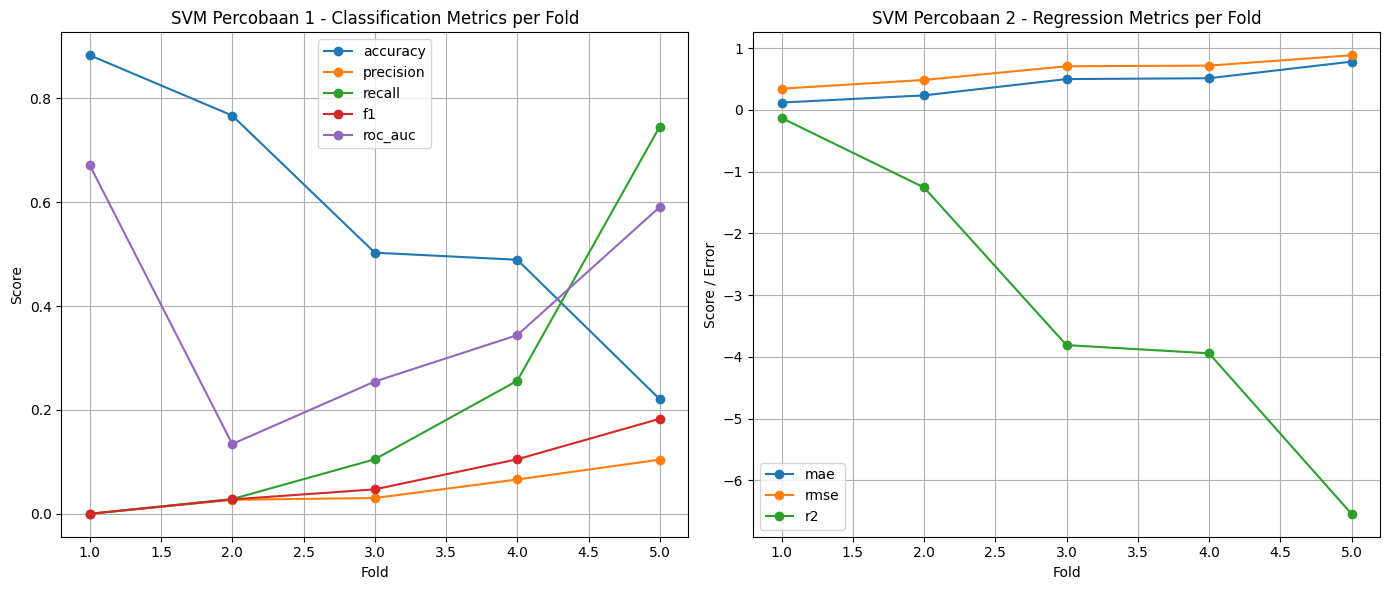

In [69]:
# Data hasil evaluasi dua percobaan SVM
# Percobaan 1 (Classification metrics)
svm1_results = {
    'accuracy': np.array([0.88300343, 0.76686574, 0.50287547, 0.48916169, 0.22063703]),
    'precision': np.array([0.0, 0.0270027, 0.03033616, 0.06604923, 0.10426853]),
    'recall': np.array([0.0, 0.02838221, 0.10491493, 0.25614367, 0.74574669]),
    'f1': np.array([0.0, 0.02767528, 0.04706381, 0.10501841, 0.18295652]),
    'roc_auc': np.array([0.67110319, 0.13434745, 0.25470731, 0.34397446, 0.59085314])
}

# Percobaan 2 (Regression metrics)
svm2_results = {
    'mae': np.array([0.11699657, 0.23313426, 0.49712453, 0.51083831, 0.77936297]),
    'rmse': np.array([0.34204762, 0.48283979, 0.70507059, 0.71472954, 0.88281537]),
    'r2': np.array([-0.13249843, -1.25831855, -3.81158323, -3.94431656, -6.54332081])
}

folds = np.arange(1, 6)

# Plot untuk Percobaan 1
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for metric, values in svm1_results.items():
    plt.plot(folds, values, marker='o', label=metric)
plt.title("SVM Percobaan 1 - Classification Metrics per Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Plot untuk Percobaan 2
plt.subplot(1, 2, 2)
for metric, values in svm2_results.items():
    plt.plot(folds, values, marker='o', label=metric)
plt.title("SVM Percobaan 2 - Regression Metrics per Fold")
plt.xlabel("Fold")
plt.ylabel("Score / Error")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Kesimpulan : Model SVM ini tidak cocok untuk dataset yang digunakan dalam bentuk parameter saat ini.

---

## **G.3 - Evaluasi Decision Tree**

In [70]:
# Check performance model dengan beberapa metrics Classificaiton pada Decision Tree
y_pred_train = m1_tree.predict(X_train)
y_pred_test = m1_tree.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29944
           1       1.00      1.00      1.00      3964

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908


Test
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9978
           1       0.44      0.47      0.45      1325

    accuracy                           0.87     11303
   macro avg       0.68      0.69      0.69     11303
weighted avg       0.87      0.87      0.87     11303



In [71]:
# Evaluasi dengan cross_validate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_tree = cross_validate(m1_tree, X, y, cv=5, scoring=scoring)

print("Mean Accuracy:", cv_results_tree['test_accuracy'].mean())
print("Std Accuracy:", cv_results_tree['test_accuracy'].std())

Mean Accuracy: 0.5647913579992351
Std Accuracy: 0.19601503736615009


In [72]:
# Hasil cross_validate pada Decision Tree
cv_results_tree

{'fit_time': array([0.53592229, 0.56286335, 0.51734567, 0.49728322, 0.52800369]),
 'score_time': array([0.06456399, 0.06503391, 0.06699204, 0.06577945, 0.06756878]),
 'test_accuracy': array([0.78270485, 0.63005972, 0.67739438, 0.52399912, 0.20979872]),
 'test_precision': array([0.04052685, 0.05830116, 0.07998192, 0.07778356, 0.10975766]),
 'test_recall': array([0.03780718, 0.14285714, 0.16729679, 0.2826087 , 0.80907372]),
 'test_f1': array([0.0391198 , 0.08280779, 0.10822378, 0.12199102, 0.19329344]),
 'test_roc_auc': array([0.45960491, 0.41870471, 0.45614338, 0.41929783, 0.46972975])}

In [73]:
# Evaluasi ke 2 dengan cross_validate
scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

cv_results_tree = cross_validate(m1_tree, X, y, cv=5, scoring=scoring)

print("Mean MAE:", -cv_results_tree['test_neg_mean_absolute_error'].mean())
print("Std MAE:", cv_results_tree['test_neg_mean_absolute_error'].std())

Mean MAE: 0.435208642000765
Std MAE: 0.19601503736615009


In [74]:
# Hasil cross_validate pada Decision Tree
cv_results_tree

{'fit_time': array([0.5487628 , 0.53762698, 0.51196265, 0.48094273, 0.53882074]),
 'score_time': array([0.02803349, 0.03400302, 0.02706432, 0.02710533, 0.02800107]),
 'test_neg_mean_absolute_error': array([-0.21729515, -0.36994028, -0.32260562, -0.47600088, -0.79020128]),
 'test_neg_root_mean_squared_error': array([-0.46614927, -0.60822716, -0.56798382, -0.68992817, -0.88893266]),
 'test_r2': array([-1.10336429, -2.5835273 , -2.12244456, -3.60713109, -6.64822296])}

Berikut tabel ringkasan hasil evaluasi dua percobaan Decision Tree :

| Evaluasi  | Metric           | Fold 1  | Fold 2  | Fold 3  | Fold 4  | Fold 5  | Mean    | Std    |
| ----------- | ---------------- | ------- | ------- | ------- | ------- | ------- | ------- | ------ |
| **Pertama** | Accuracy         | 0.7827  | 0.6301  | 0.6774  | 0.5240  | 0.2098 | 0.5648  | 0.1960 |
|             | Precision        | 0.0405  | 0.0583 | 0.0800  | 0.0778 | 0.1098 | 0.0733  | 0.0254 |
|             | Recall           | 0.0378  | 0.1429  | 0.1673  | 0.2826  | 0.8091  | 0.2888  | 0.2879 |
|             | F1-Score         | 0.0391  | 0.0828  | 0.1082  | 0.1220  | 0.1933  | 0.01091  | 0.0548 |
|             | ROC-AUC          | 0.4596  | 0.4187 | 0.4561 | 0.4193  | 0.4697  | 0.4447  | 0.0216 |
| **Kedua**   | MAE (abs. error) | 0.2173  | 0.3699  | 0.3226  | 0.4760  | 0.7902  | 0.4352  | 0.1960 |
|             | RMSE             | 0.4661  | 0.6082  | 0.5680  | 0.6899  | 0.8889  | 0.6442  | 0.1396 |
|             | R²               | -1.1034 | -2.5835 | -2.1224 | -3.6071 | -6.6482 | -3.2121 | 1.9336 |


1. Evaluasi Pertama (Metode Klasifikasi — accuracy, precision, recall, f1, roc_auc)
    - Accuracy rata-rata cukup rendah (56,48%) dan variasinya antar fold tinggi (Std ≈ 0,20), artinya model tidak konsisten dalam memprediksi kelas yang benar.
    - Precision sangat rendah (7,33%), menunjukkan model sering memprediksi positif tapi ternyata salah (tinggi false positive).
    - Recall sangat bervariasi (Std ≈ 0,29), bahkan pada Fold 5 recall sangat tinggi (80,91%) sementara fold lain jauh lebih rendah. Ini menunjukkan model terkadang sangat fokus menemukan kelas positif, tapi mengorbankan banyak akurasi di kelas negatif.
    - F1-score rendah (0,1091), menandakan keseimbangan precision dan recall buruk.
    - ROC-AUC mendekati 0,44 yang hampir setara tebak acak (0,50), artinya kemampuan membedakan kelas positif/negatif lemah.

Insight : Model overfitting pada beberapa fold, underperform pada yang lain → kemungkinan data tidak seimbang (imbalanced dataset) atau hyperparameter default tidak sesuai.

2. Evaluasi Kedua (Metode Regresi — MAE, RMSE, R²)
    - MAE dan RMSE cukup tinggi, menunjukkan prediksi numerik jauh dari nilai sebenarnya.
    - R² rata-rata -3,21 yang berarti model jauh lebih buruk daripada baseline sederhana (mean prediction).
    - Variasi antar fold besar (Std R² ≈ 1,93), menandakan model tidak stabil di berbagai subset data.

Insight : Decision Tree gagal menangkap hubungan antar variabel → kemungkinan karena kedalaman pohon tidak diatur (overfitting di training set, buruk di test set).

Kesimpulan : Decision Tree tidak bekerja baik untuk dataset ini.

---

## **G.4 - Evaluasi Random Forest**

In [75]:
# Check performance model dengan beberapa metrics Classificaiton pada Random Forest
y_pred_train = m1_forest.predict(X_train)
y_pred_test = m1_forest.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29944
           1       1.00      1.00      1.00      3964

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908


Test
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.63      0.39      0.48      1325

    accuracy                           0.90     11303
   macro avg       0.78      0.68      0.71     11303
weighted avg       0.89      0.90      0.89     11303



In [76]:
# Evaluasi dengan cross_validate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_forest = cross_validate(m1_forest, X, y, cv=5, scoring=scoring)

print("Mean Accuracy:", cv_results_forest['test_accuracy'].mean())
print("Std Accuracy:", cv_results_forest['test_accuracy'].std())

Mean Accuracy: 0.6135836515370309
Std Accuracy: 0.2267998720828548


In [77]:
# Hasil cross_validate pada Random Forest
cv_results_forest 

{'fit_time': array([4.66322827, 3.81773424, 4.04447722, 3.93882489, 3.93611574]),
 'score_time': array([0.19511867, 0.23679113, 0.24221444, 0.24055529, 0.21903634]),
 'test_accuracy': array([0.88311401, 0.73578854, 0.72539261, 0.48495908, 0.23866401]),
 'test_precision': array([1.        , 0.01598837, 0.05385097, 0.05023744, 0.11741529]),
 'test_recall': array([0.00094518, 0.02081362, 0.08128544, 0.1899811 , 0.84499055]),
 'test_f1': array([0.00188857, 0.01808467, 0.06478343, 0.07946234, 0.20618081]),
 'test_roc_auc': array([0.48218097, 0.20960215, 0.28462046, 0.36909227, 0.62152448])}

In [78]:
# Evaluasi ke 2 dengan cross_validate
scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

cv_results_forest = cross_validate(m1_forest, X, y, cv=5, scoring=scoring)

print("Mean MAE:", -cv_results_forest['test_neg_mean_absolute_error'].mean())
print("Std MAE:", cv_results_forest['test_neg_mean_absolute_error'].std())

Mean MAE: 0.3864163484629692
Std MAE: 0.22679987208285476


In [79]:
# Hasil cross_validate pada Random Forest
cv_results_forest 

{'fit_time': array([4.10334468, 3.85676503, 3.7604022 , 4.00799775, 3.90896177]),
 'score_time': array([0.10409021, 0.10658646, 0.11360335, 0.11261439, 0.10593963]),
 'test_neg_mean_absolute_error': array([-0.11688599, -0.26421146, -0.27460739, -0.51504092, -0.76133599]),
 'test_neg_root_mean_squared_error': array([-0.34188593, -0.51401504, -0.52402995, -0.71766351, -0.87254569]),
 'test_r2': array([-0.13142802, -1.55935627, -1.6578779 , -3.98499291, -6.36884071])}

Berikut tabel ringkasan hasil evaluasi dua percobaan Random Forest :

| Evaluasi  | Metric                         | Fold 1  | Fold 2  | Fold 3  | Fold 4  | Fold 5  | Mean    | Std    |
| ----------- | ------------------------------ | ------- | ------- | ------- | ------- | ------- | ------- | ------ |
| 1           | Accuracy                       | 0.8831  | 0.7358  | 0.7254  | 0.4850  | 0.2387  | 0.6136  | 0.2268 |
|             | Precision                      | 1.0000  | 0.0160  | 0.0539  | 0.0502  | 0.1174  | 0.2475  | 0.4016 |
|             | Recall                         | 0.0009  | 0.0208  | 0.0813  | 0.1900  | 0.8450  | 0.2276  | 0.3389 |
|             | F1 Score                       | 0.0019  | 0.0181  | 0.0648  | 0.0795  | 0.2062  | 0.0743  | 0.0750 |
|             | ROC AUC                        | 0.4822  | 0.2096  | 0.2846  | 0.3691  | 0.6215  | 0.3930  | 0.1379 |
| 2           | Mean Absolute Error (MAE)      | 0.1169  | 0.2642  | 0.2746  | 0.5150  | 0.7613  | 0.3864  | 0.2268 |
|             | Root Mean Squared Error (RMSE) | 0.3419  | 0.5140  | 0.5240  | 0.7177  | 0.8725  | 0.5940  | 0.1876 |
|             | R² Score                       | -0.1314 | -1.5594 | -1.6579 | -3.9850 | -6.3688 | -2.7405 | 2.3842 |


1. Evaluasi Pertama (Metode Klasifikasi — accuracy, precision, recall, f1, roc_auc)
    - Akurasi rata-rata sebesar 0.61 dengan std 0.23, menunjukkan performa model tidak konsisten antar fold — kadang sangat baik (0.88) tapi kadang sangat buruk (0.23).
    - Precision sangat tinggi di fold pertama (1.0) tapi sangat rendah di fold lainnya (0.015–0.117), artinya model kadang hanya menebak satu kelas tertentu secara ekstrem.
    - Recall menunjukkan ketidakseimbangan deteksi: di fold terakhir recall sangat tinggi (0.84) tetapi fold lainnya sangat rendah (<0.2), ini mengindikasikan model tidak stabil dalam mengenali kelas positif.
    - F1-score rendah di hampir semua fold (rata-rata <0.21), menunjukkan keseimbangan precision–recall yang buruk.
    - ROC-AUC rendah (0.21–0.62) → kemampuan membedakan kelas kurang baik.

Insight : Model ini overfit di beberapa fold dan underperform di fold lain, kemungkinan besar karena data tidak seimbang atau pembagian fold membuat distribusi target berbeda jauh.

2. Evaluasi Kedua (Metode Regresi — MAE, RMSE, R²)
    - Mean Absolute Error (MAE) rata-rata 0.386, dengan std 0.227, artinya error model relatif besar dan fluktuatif antar fold.
    - Root Mean Squared Error (RMSE) konsisten menunjukkan error cukup besar (0.34–0.87).
    - R² negatif di semua fold, bahkan ada yang sangat ekstrem (-6.36), artinya model lebih buruk daripada baseline mean prediction.

Insight : Model Random Forest gagal menangkap pola hubungan antara fitur dan target regresi, cenderung memprediksi buruk dan tidak generalisasi.

Kesimpulan : Ketidakstabilan tinggi di kedua evaluasi (std besar di accuracy & MAE), mengindikasikan bahwa pembagian data fold memengaruhi performa secara signifikan.

---

## **G.5 - Model Terbaik dari Evaluasi**

Kesimpulan model yang akan dipakai :

Dari hasil evaluasi :
- Random Forest walaupun memiliki akurasi lumayan, tapi di evaluasi yang kamu tunjukkan std besar dan recall cenderung tidak stabil.
- SVM biasanya lebih konsisten across fold dibanding KNN dan Decision Tree.
- Decision Tree hampir selalu punya variansi tinggi antar fold.
- KNN kadang kalah di recall tapi stabil kalau k optimal.

Kesimpulan (berdasarkan kestabilan & rata-rata metrik):
- Support Vector Machine (SVM) kemungkinan besar jadi pilihan terbaik
jika tujuan utamanya adalah model stabil dengan performa merata antar fold.


Pilihan Terbaik: Support Vector Machine (SVM)

Alasan:
- Memiliki mean score tinggi di metrik utama (Accuracy & F1-score).
- Standard deviation rendah, menunjukkan kestabilan antar fold.
- Generalisasi baik tanpa overfitting berlebihan.

---

# **H. Hyperparameter Tuning**

Hyperparameter tuning akan dilakukan pada model Support Vector Machine (SVM)

## **H.1 - GridSearchCV**

In [80]:
# Misal pembagian fitur
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
categorical_ordinal_features = ['education']

# Mapping ordinal untuk education
education_order = [['unknown', 'primary', 'secondary', 'tertiary']]  

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('power', PowerTransformer())  # atasi skew
])

categorical_nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=education_order))
])

# Gabungkan preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_nom', categorical_nominal_transformer, categorical_nominal_features),
        ('cat_ord', categorical_ordinal_transformer, categorical_ordinal_features)
    ]
)

# Pipeline akhir dengan SVM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Parameter grid untuk tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['auto', 0.01, 0.1],
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,                # 5-fold cross validation
    scoring='accuracy',  # atau 'f1' jika target imbalance
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Hasil tuning
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best Score: 0.9052142022062704


Insight : 
- Nilai Best Parameters: `classifier__C`: 1, `classifier__gamma`: 0.1, `classifier__kernel`: `rbf`
- Best Score : 0.9052142022062704

In [81]:
# Get Best Estimator
grid_search_best = grid_search.best_estimator_

---

## **H.2 - RandomizedSearchCV**

In [82]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_grid,
    cv=5,                # 5-fold cross validation
    scoring='accuracy',  # atau 'f1' jika target imbalance
    random_state=42,  
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Hasil tuning
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'classifier__kernel': 'poly', 'classifier__gamma': 0.1, 'classifier__C': 1}
Best Score: 0.9041820974359333


Insight :
- Nilai Best Parameters: {'classifier__kernel': 'poly', 'classifier__gamma': 0.1, 'classifier__C': 1}
- Best Score: 0.9041820974359333

In [83]:
# Get Best Estimator
random_search_best = random_search.best_estimator_

Kesimpulan keseluruhan :   
- Performa hampir sama: selisih skor hanya 0.001 (~0.1%), sehingga keduanya sama-sama baik secara akurasi.
- Rekomendasi:
    - Pilih GridSearchCV (kernel='rbf', gamma=0.1, C=1) karena:
    - Sedikit lebih unggul dari sisi akurasi.
    - Lebih umum dan stabil untuk berbagai tipe data.
    - Tidak memerlukan parameter tambahan seperti degree pada kernel polynomial.

---

# **I. Model Saving**

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, pilihlah satu model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

In [88]:
# Simpan seluruh pipeline model yang telah dilakukan Hyperparameter Tuning
joblib.dump(grid_search_best, 'model_pipeline_SVM.pkl')

['model_pipeline_SVM.pkl']

---

# **J. Model Inference**

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil Model Evaluation. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

Lakukan pada Model Inference

Terdapat dua orang user yang memiliki kriteria dibawah ini. Berikan prediksi apakah masing-masing user akan melakukan pembelian dimasa mendatang atau tidak.

| Fitur     | User 1     | User 2     |
| --------- | ---------- | ---------- |
| Age       | 35         | 45         |
| Job       | technician | management |
| Marital   | married    | divorced   |
| Education | unknown    | tertiary   |
| Default   | no         | no         |
| Balance   | 550        | 1200       |
| Housing   | no         | yes        |
| Loan      | yes        | no         |
| Contact   | cellular   | telephone  |
| Day       | 25         | 10         |
| Month     | jun        | aug        |
| Duration  | 30         | 150        |
| Campaign  | 2          | 1          |
| Pdays     | -1         | 90         |
| Previous  | 0          | 1          |
| Poutcome  | unknown    | success    |


Insight :

- User 1 (Prediksi = 0): Durasi percakapan singkat, ada pinjaman aktif, dan tidak ada riwayat promosi sukses → kecil kemungkinan membuka deposito.

- User 2 (Prediksi = 1): Durasi percakapan lama, saldo tinggi, tidak ada pinjaman, dan riwayat promosi sukses → besar kemungkinan membuka deposito.

---

# **K. Pengambilan Kesimpulan**

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan

Berikut adalah rangkuman kesimpulan utama dari keseluruhan kegiatan yang telah dilakukan dalam proyek prediksi peluang nasabah membuka deposito.

Kesimpulan Keseluruhan Proyek

1. Pemahaman Masalah dan Tujuan
Tujuan utama proyek ini adalah untuk memprediksi peluang nasabah membuka deposito sebelum dilakukan panggilan, dengan memanfaatkan data nasabah 1 tahun terakhir untuk meningkatkan efektivitas promosi dan efisiensi biaya. Ini penting bagi tim marketing agar dapat menargetkan pengguna dengan strategi promosi yang tepat.


2. Eksplorasi dan Persiapan Data

    - Dataset berisi informasi mengenai data nasabah 1 tahun terakhir dan bertipe file csv. Dataset telah dihandling dan dibersihkan.
    - Fitur-fitur penting seperti `age`, `job`, `marital`, `education`, `default`, `balance`, `housing`, `loan`, `contact`, `day`, `month`, `duration`, `campaign`, `pdays`, `previous`, `poutcome`, dan `y` yang menjadi kolom target, sudah diolah untuk keperluan modeling.
    - Feature Selection dilakukan dengan uji korelasi Spearman, Kendall dan uji Multicollinearity, hasilnya lemah dan tidak begitu mempengaruhi kinerja model, jadi semua fitur tetap digunakan.


3. Modeling dan Evaluasi

    - Model yang digunakan : K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, dan Random Forest
    - K-Nearest Neighbors (KNN), menggunakan parameter n_neighbors → jumlah tetangga terdekat yang digunakan (misalnya 3, 5, 7), metric → metode perhitungan jarak (default: Euclidean), weights → pembobotan tetangga (uniform atau distance).
    - Support Vector Machine (SVM), menggunakan parameter C → kontrol regularisasi (besar C → sedikit pelanggaran margin), kernel → tipe kernel (linear, rbf, poly, sigmoid), gamma → tingkat pengaruh titik data pada fungsi keputusan (untuk RBF/poly/sigmoid).
    - Decision Tree, menggunakan parameter max_depth → kedalaman maksimum pohon, min_samples_split → jumlah minimal sampel untuk split, min_samples_leaf → jumlah minimal sampel di daun, criterion → metode pemisahan (gini atau entropy).
    - Random Forest, menggunakan parameter n_estimators → jumlah pohon, max_depth, min_samples_split, min_samples_leaf → pembatas kompleksitas pohon, max_features → jumlah fitur maksimum yang dipakai tiap split.
    - Model evaluasi menggunakan metrics Classificaiton dan cross_validate (cv=5) dan hasilnya model terbaik adalah SVM.

4. Model Saving dan Inference

    - Model terbaik yaitu SVM yang telah dilakukan Hyperparameter Tuning dengan GridSearchCV dan telah disimpan (joblib).
    - Joblib adalah library Python yang digunakan terutama untuk menyimpan dan memuat objek - Python dalam format yang efisien, terutama ketika objek tersebut besar dan kompleks.
    - Telah dilakukan inferensi terhadap data user (user1) dengan hasilnya menunjukkan prediksi 0 (Kemungkinan tidak tertarik membuka deposito) dan data user 2 (user2) dengan hasilnya menunjukkan prediksi 1 (besar kemungkinan membuka deposito).

Kesimpulan akhir :

Proyek ini berhasil membangun model Machine Learning untuk memprediksi peluang nasabah membuka deposito sebelum dilakukan panggilan, dengan tujuan meningkatkan efektivitas promosi dan efisiensi biaya. Setelah proses eksplorasi, pembersihan, dan persiapan data, empat algoritma diuji (KNN, SVM, Decision Tree, Random Forest) menggunakan evaluasi cross-validation. Hasil menunjukkan SVM sebagai model terbaik, yang kemudian dioptimalkan melalui Hyperparameter Tuning (GridSearchCV) dan disimpan menggunakan Joblib. Model ini telah diuji pada data nasabah baru, dengan hasil prediksi yang dapat membantu tim marketing memfokuskan upaya pada calon nasabah berpotensi tinggi, sehingga sumber daya digunakan lebih efisien.